# Chapter 10 - Simple Linear Regression

## By Rylan Melley

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [9]:
data = sns.load_dataset('diamonds')

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value, or correlation coefficient, measures the strength and direction of the linear relationship between two variables
* The r-value ranges from -1 to 1
* An r-value greater than 0 indicates a positive correlation
* An r-value less than 0 indicates a negative correlation
* An r-value of 0 indicates no correlation,

In [40]:
numeric_data = data[['carat', 'depth', 'table', 'price', 'x', 'y']]
numeric_data.head(7).corr

<bound method DataFrame.corr of    carat  depth  table  price     x     y
0   0.23   61.5   55.0    326  3.95  3.98
1   0.21   59.8   61.0    326  3.89  3.84
2   0.23   56.9   65.0    327  4.05  4.07
3   0.29   62.4   58.0    334  4.20  4.23
4   0.31   63.3   58.0    335  4.34  4.35
5   0.24   62.8   57.0    336  3.94  3.96
6   0.24   62.3   57.0    336  3.95  3.98>

<Axes: >

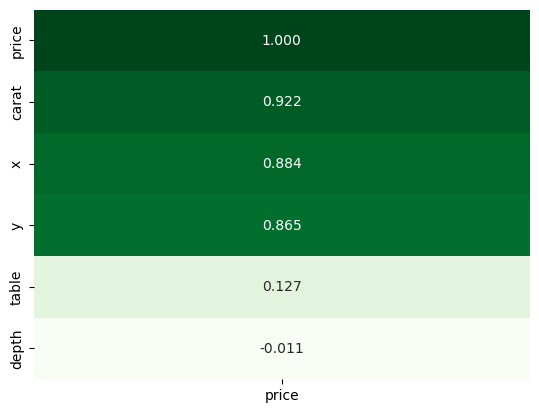

In [44]:
sns.heatmap(data=numeric_data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. the dataset is split into a training dataset that’s used to train themodel and a test dataset that’s used to validate the model. These training and test datasets can be created with specific criteria or by randomly selecting values and assigning them to either the training or test dataset.2. the training dataset is used to create the regression model.
3. the test dataset is run against the model to see how accurate the results of the model are. If the values that are generated by the model are close to the actual values, the model is considered to be valid
4. if the model is valid, you can use it to predict the dependent variable based on the independent variables. 

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(numeric_data[['carat']], numeric_data[['price']], test_size=0.30, random_state=20)

In [66]:
model = LinearRegression()
model

LinearRegression()

In [68]:
model.fit(x_train, y_train)

LinearRegression()

In [70]:
model.score(x_test, y_test)

0.8504107786474794

In [72]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [76]:
predicted_price = pd.DataFrame(y_predicted, columns=['predicted_price']) 
predicted_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [78]:
combined = predicted_price.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [82]:
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price','predicted_price'], var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


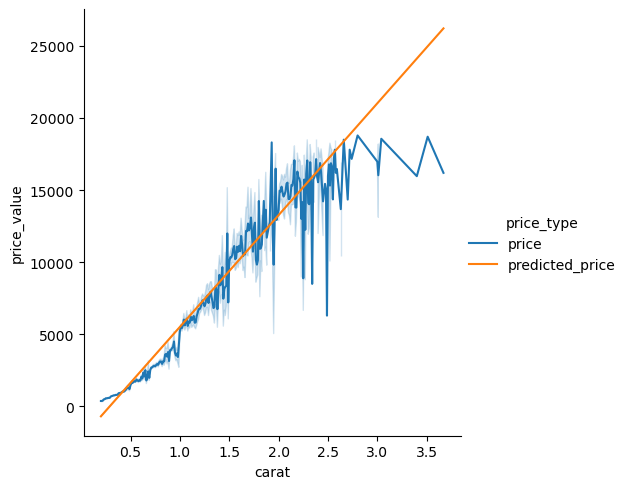

In [90]:
sns.relplot(data=melted, kind ='line', x='carat', y='price_value', hue='price_type')

## Regression line equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [93]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [95]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [97]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [99]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800453947


In [117]:
estimate = m * 0.70 + b
print(f'The predicted price for a 0.70 carat diamond is ${estimate}')

The predicted price for a 0.70 carat diamond is $[3173.13735253]


In [119]:
estimate = m * 0.54 + b
print(f'The predicted price for a 0.50 carat diamond is ${estimate}')

The predicted price for a 0.50 carat diamond is $[1932.10925366]


### Yes, the estimates in the previous two cells are close to the predicted prices in the results of step 18